<a href="https://colab.research.google.com/github/marwah340/latihan-google-colab/blob/main/k_means_dcs_(11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/drive/My Drive/mesin learning/data set/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

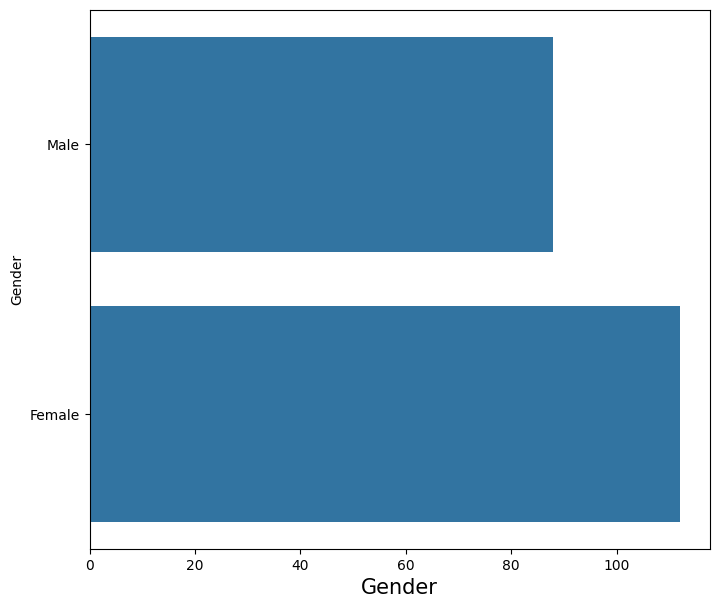

In [9]:
plt.figure(figsize=(8,7))
sns.countplot(df["Gender"])
plt.xlabel("Gender",fontsize = 15)
plt.show()

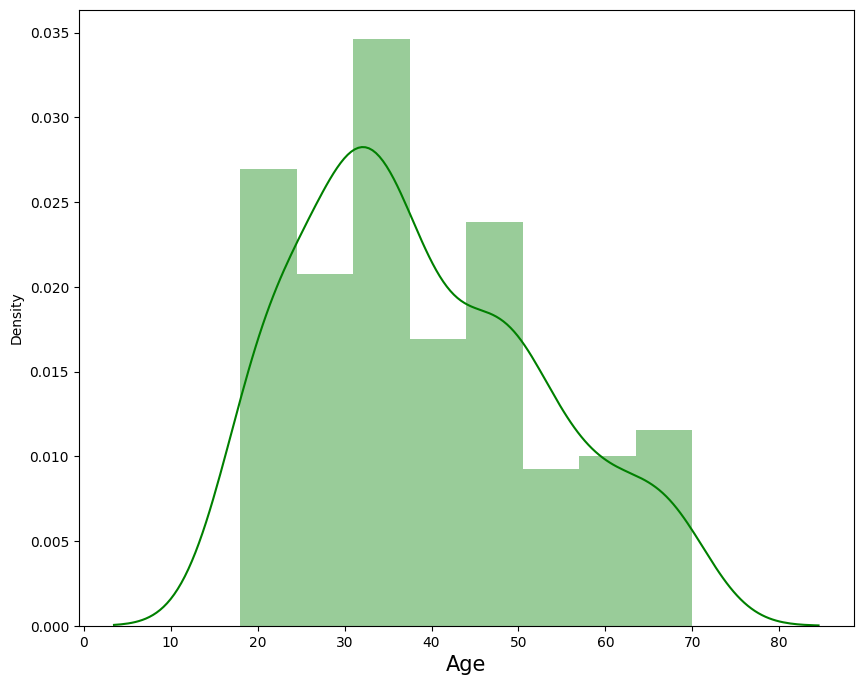

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"],color = "Green")
plt.xlabel("Age",fontsize = 15)
plt.show()

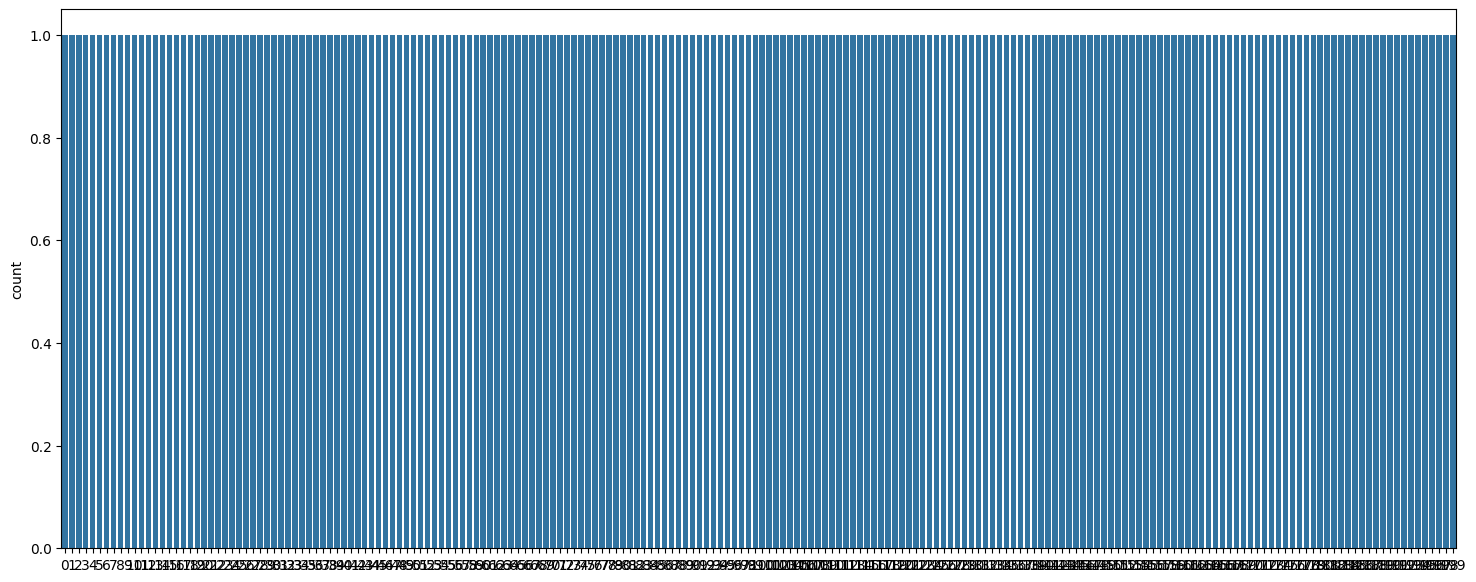

In [11]:
plt.figure(figsize=(18,7))
sns.countplot(df["Age"])
plt.show()

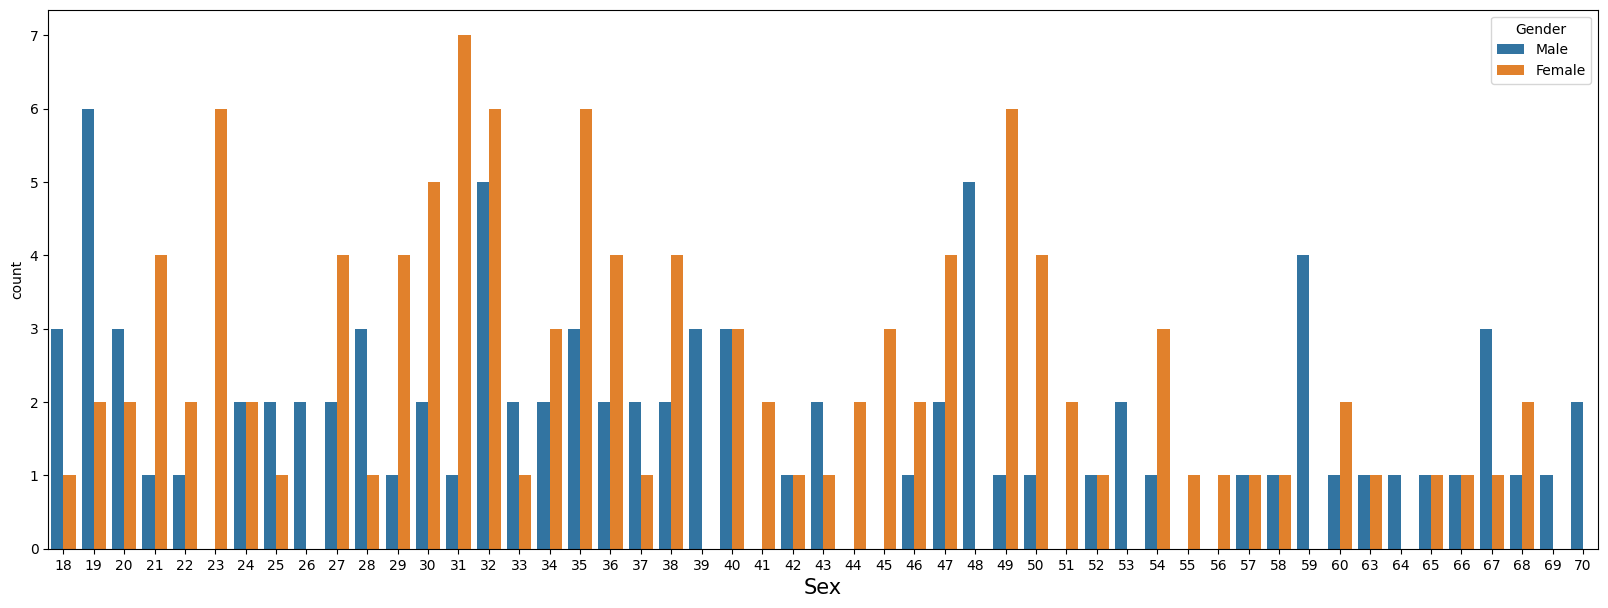

In [12]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [13]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


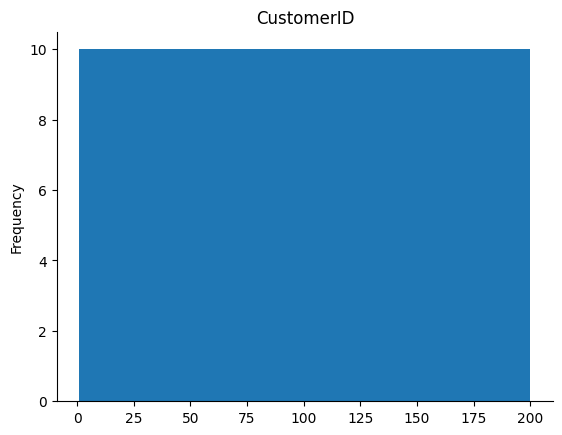

In [14]:
# @title CustomerID

from matplotlib import pyplot as plt
df['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# drop the CustomerID Column not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [16]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


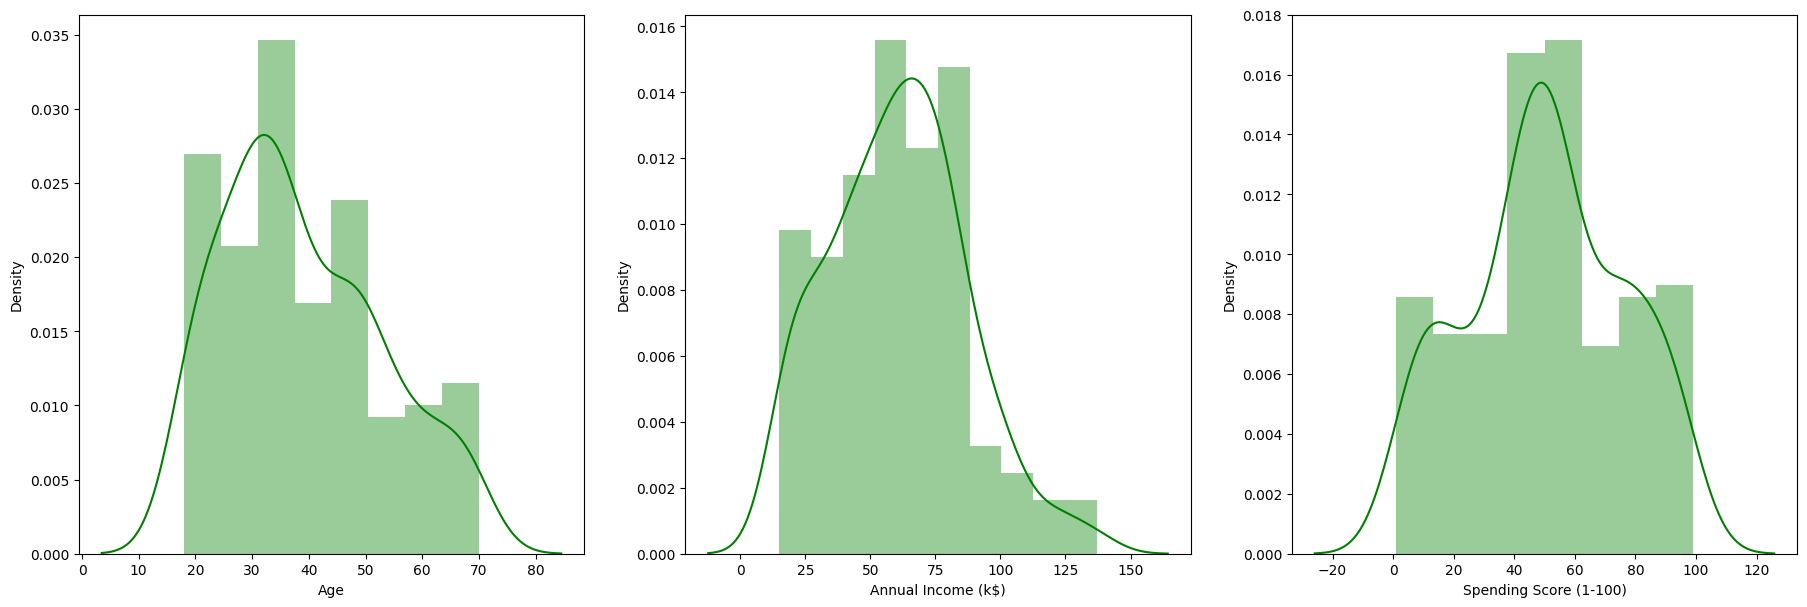

In [17]:
plt.figure(figsize=(30,7))
plotnumber = 1

for column in df.iloc[:,1:]:
  if plotnumber <= 8:
    ax = plt.subplot(1,4,plotnumber)
    sns.distplot(df[column],color = "green")
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [18]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [19]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [20]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# K-Means Clustering menggunakan Scikit-Learn
Pengelompokan K-means adalah jenis unsupervised learning yang digunakan ketika kita memiliki data yang tidak berlabel (yaitu, data tanpa kategori atau grup yang ditentukan). Tujuan dari algoritma ini adalah untuk menemukan kelompok dalam data, dengan jumlah kelompok diwakili oleh variabel K. Algoritma bekerja secara iteratif untuk menetapkan setiap titik data ke salah satu kelompok K berdasarkan fitur yang disediakan. Titik data dikelompokkan berdasarkan kesamaan fitur. Hasil dari algoritma K-means clustering adalah:

Centroid dari cluster K, yang dapat digunakan untuk memberi label pada data baru. Label untuk data pelatihan (setiap titik data ditugaskan ke satu cluster)

Agar algoritma khusus ini dapat bekerja, jumlah cluster harus ditentukan terlebih dahulu. K dalam K-means mengacu pada jumlah cluster.

Algoritma K-means dimulai dengan memilih nilai centroid secara acak untuk setiap cluster. Setelah itu algoritma secara iteratif melakukan tiga langkah:

(i) Temukan jarak Euclidean antara setiap instance data dan pusat massa semua cluster;

(ii) Tetapkan instance data ke cluster centroid dengan jarak terdekat;

(iii) Hitung nilai centroid baru berdasarkan nilai rata-rata koordinat semua instance data dari cluster yang bersangkutan.

# Contoh Sederhana
Mari kita coba melihat bagaimana algoritma K-means bekerja dengan bantuan contoh buatan tangan, sebelum mengimplementasikan algoritma tersebut di Scikit-Learn.

Kita memiliki satu set contoh data dua dimensi berikut bernama D.

In [21]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Di sini sebagian besar fokus pada Pendapatan Tahunan dan Skor Pengeluaran

In [23]:
df.iloc[:,[2,3]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [24]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [25]:
X = df.iloc[:,[2,3]].values
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [26]:
type(X)

numpy.ndarray

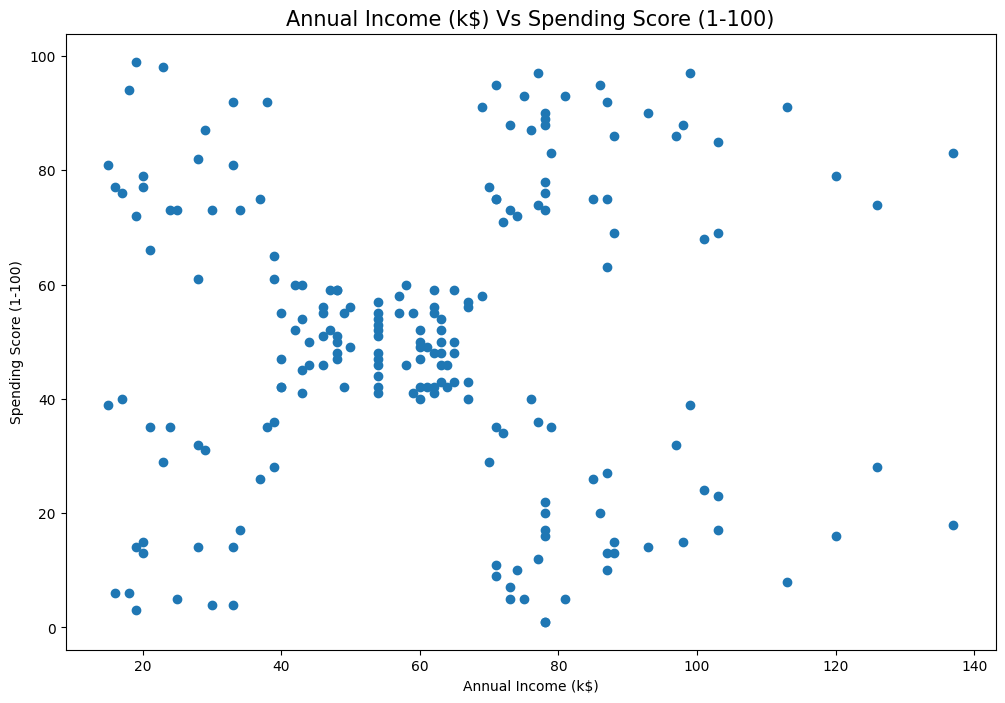

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) Vs Spending Score (1-100)",fontsize = 15)
plt.show()

# Implementasi Algoritma K-Means

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_) #no of centroids

[[60.05405405 31.54054054]
 [61.19101124 73.47191011]]


In [29]:
print(kmeans.labels_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


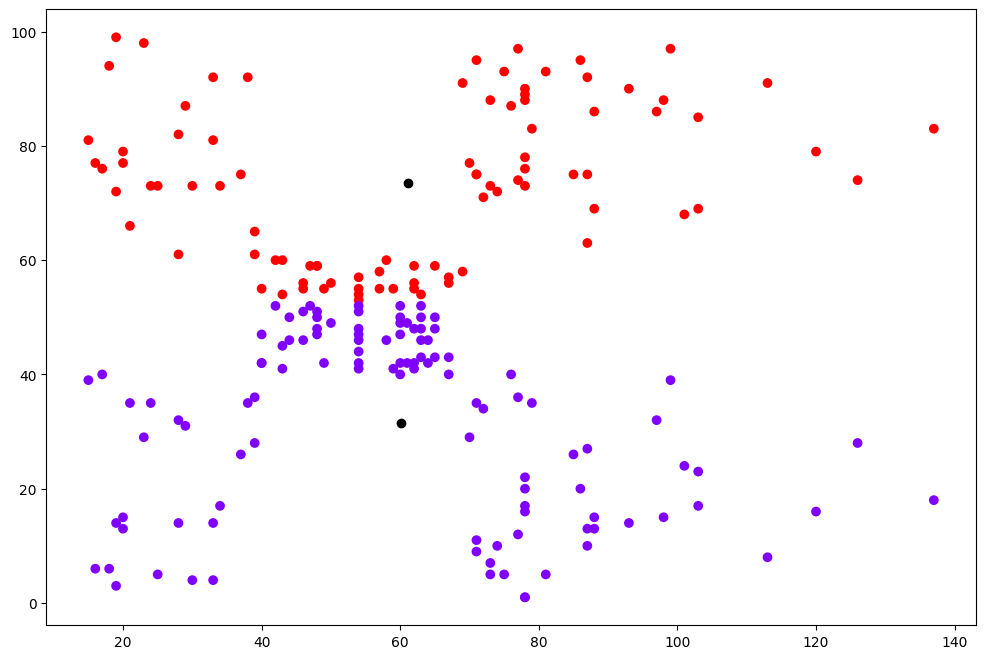

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

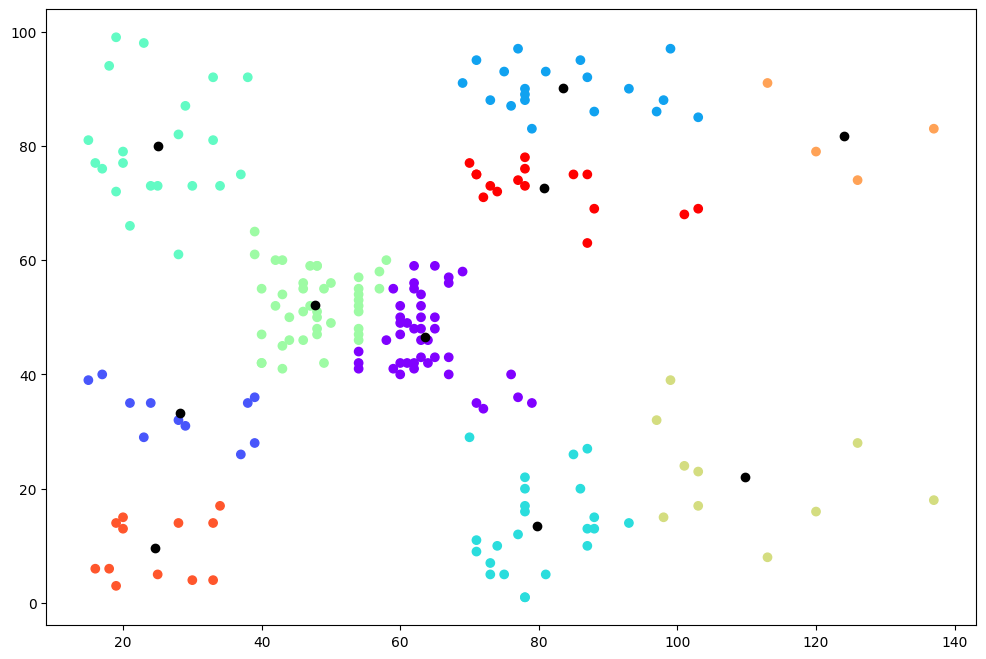

In [31]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

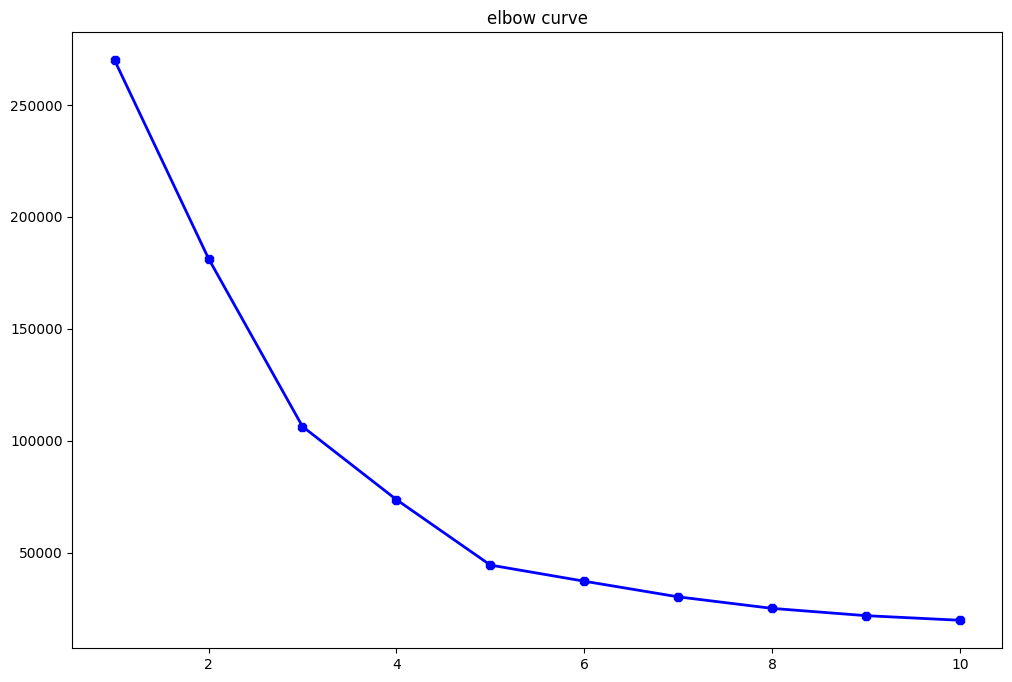

In [32]:
plt.figure(figsize=(12,8))

wcss=[] # distortion # within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2, color="blue", marker ="8")
plt.title('elbow curve')
plt.show()

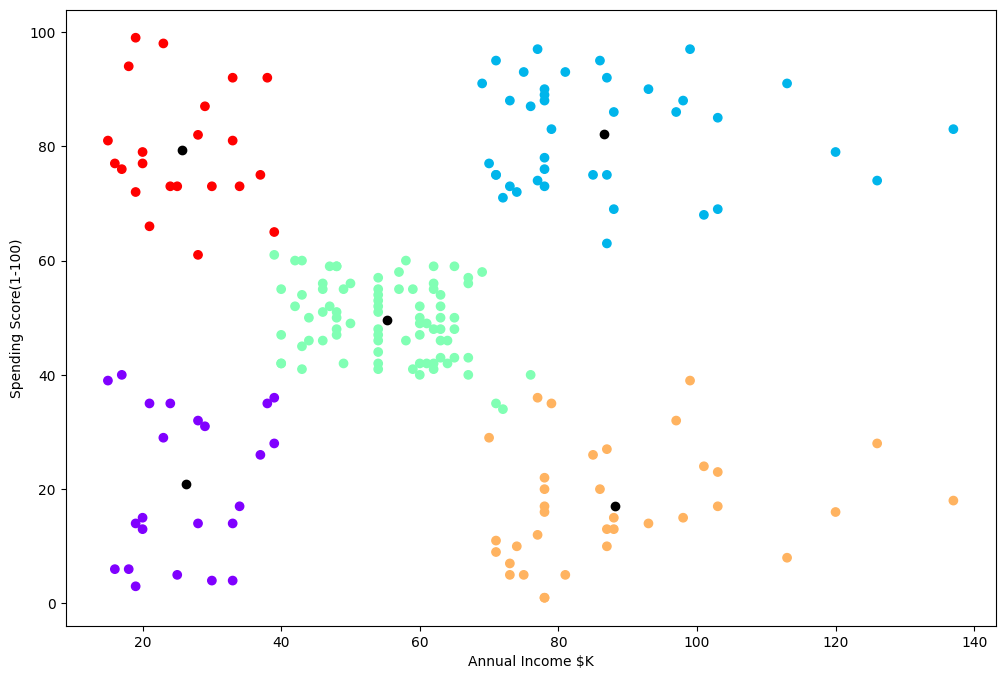

In [33]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score(1-100)')
plt.show()